Stephen Coates
November 5, 2024
Question 2 - how many different captains did the Chelsea womens team have?

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import time
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
url='https://fbref.com/en/squads/a6a4e67d/2023-2024/Chelsea-Women-Stats'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")

In [3]:
print(soup.prettify())
type(soup)

<!DOCTYPE html>
<html class="no-js" data-root="/home/fb/deploy/www/base" data-version="klecko-" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>
  <link href="https://cdn.ssref.net/req/202411012" rel="dns-prefetch"/>
  <script>
   /* https://docs.osano.com/hc/en-us/articles/22469433444372-Google-Consent-Mode-v2  */
  window.dataLayer = window.dataLayer ||[];
      function gtag(){dataLayer.push(arguments);}
      gtag('consent','default',{
        'ad_storage':'denied',
        'analytics_storage':'denied',
        'ad_user_data':'denied',
        'ad_personalization':'denied',
        'personalization_storage':'denied',
        'functionality_storage':'granted',
        'security_storage':'granted',
        'wait_for_update': 500
      });
      gtag("set", "ads_data_redaction", true);
  </script>
  <script src="https://cmp.osano.com/16CGnCU

bs4.BeautifulSoup

In [4]:
player_list = [ ]
stats_table = soup.find(class_='stats_table', id="matchlogs_for").tbody
#print(stats_table)
for row in stats_table.find_all('tr'):
    date = row.find(attrs={'data-stat':'date','scope':'row'}).text
    competition = row.find(attrs={'data-stat':'comp'}).text
    opponent = row.find(attrs={'data-stat':'opponent'}).text
    captain = row.find(attrs={'data-stat':'captain'}).text
    player_list.append({'date':date, 'captain': captain, 'competition': competition, 'opponent': opponent})
print(player_list)

chelsea_qu2_player_df = pd.DataFrame(player_list)

[{'date': '2023-10-01', 'captain': 'Lauren James', 'competition': 'WSL', 'opponent': 'Tottenham'}, {'date': '2023-10-08', 'captain': 'Millie Bright', 'competition': 'WSL', 'opponent': 'Manchester City'}, {'date': '2023-10-14', 'captain': 'Millie Bright', 'competition': 'WSL', 'opponent': 'West Ham'}, {'date': '2023-10-22', 'captain': 'Millie Bright', 'competition': 'WSL', 'opponent': 'Brighton'}, {'date': '2023-11-04', 'captain': 'Millie Bright', 'competition': 'WSL', 'opponent': 'Aston Villa'}, {'date': '2023-11-12', 'captain': 'Millie Bright', 'competition': 'WSL', 'opponent': 'Everton'}, {'date': '2023-11-15', 'captain': 'Millie Bright', 'competition': 'Champions Lg', 'opponent': 'es Real Madrid'}, {'date': '2023-11-18', 'captain': 'Maren Mjelde', 'competition': 'WSL', 'opponent': 'Liverpool'}, {'date': '2023-11-23', 'captain': 'Sam Kerr', 'competition': 'Champions Lg', 'opponent': 'fr Paris FC'}, {'date': '2023-11-26', 'captain': 'Sam Kerr', 'competition': 'WSL', 'opponent': 'Leice

In [5]:
chelsea_qu2_player_df

,date,captain,competition,opponent
0,2023-10-01,Lauren James,WSL,Tottenham
1,2023-10-08,Millie Bright,WSL,Manchester City
2,2023-10-14,Millie Bright,WSL,West Ham
3,2023-10-22,Millie Bright,WSL,Brighton
4,2023-11-04,Millie Bright,WSL,Aston Villa
5,2023-11-12,Millie Bright,WSL,Everton
6,2023-11-15,Millie Bright,Champions Lg,es Real Madrid
7,2023-11-18,Maren Mjelde,WSL,Liverpool
8,2023-11-23,Sam Kerr,Champions Lg,fr Paris FC
9,2023-11-26,Sam Kerr,WSL,Leicester City


In [8]:
sns.set()

Text(0, 0.5, 'Player Name of Captain')

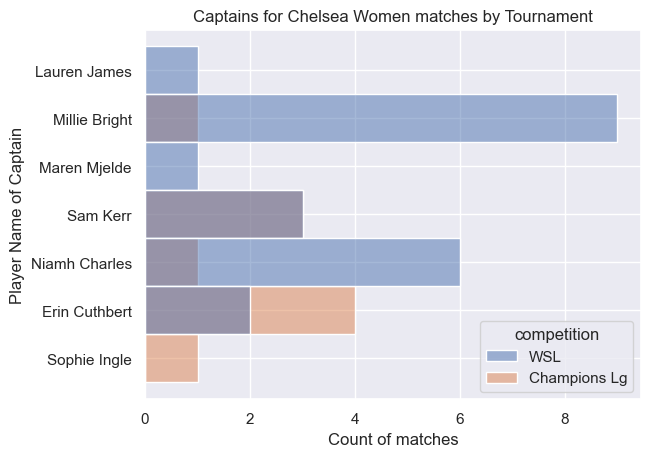

In [9]:
sns.histplot(hue = 'competition', y = 'captain', data=chelsea_qu2_player_df)
plt.title('Captains for Chelsea Women matches by Tournament')
plt.xlabel("Count of matches")
plt.ylabel('Player Name of Captain')

C:\Users\HealthCoachStephen\AppData\Local\Temp\ipykernel_31708\3395713351.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)


[Text(0, 0, 'Lauren James'),
 Text(1, 0, 'Millie Bright'),
 Text(2, 0, 'Maren Mjelde'),
 Text(3, 0, 'Sam Kerr'),
 Text(4, 0, 'Niamh Charles'),
 Text(5, 0, 'Erin Cuthbert'),
 Text(6, 0, 'Sophie Ingle')]

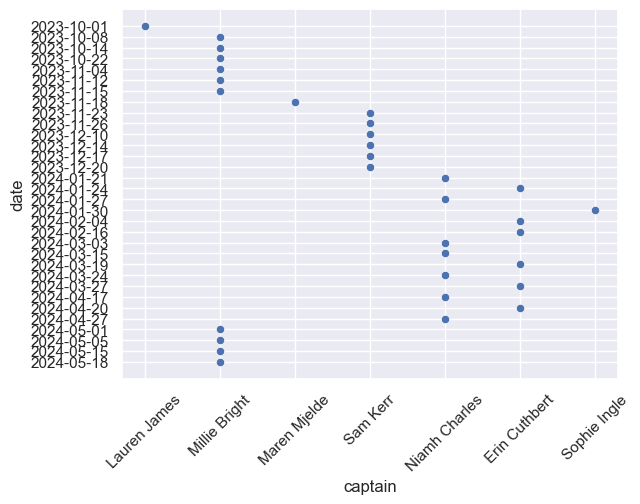

In [13]:
my_plot = sns.scatterplot(y = 'date', x = 'captain', data = chelsea_qu2_player_df)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)